# Content Dimension: text classification

### Features
* BoW
* TF-IDF
* LDA

In [1]:
import pandas as pd
from utils import preprocess
from sklearn.linear_model import LogisticRegression
import utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Load data

In [2]:
import pandas as pd

df_train = pd.read_csv('data/2018/train-test/train.csv')
df_test = pd.read_csv('data/2018/train-test/test.csv')


### Preprocess

In [3]:
from utils import preprocess

In [4]:
df_train['preprocessed_text'] = [preprocess(t) for t in df_train['text']]

In [5]:
df_test['preprocessed_text'] = [preprocess(t) for t in df_test['text']]

In [6]:
y_train = df_train['misinformation']
y_test = df_test['misinformation']

# Binary Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features = None, ngram_range = (1,2), #(1,3) 
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

bow.fit(df_train['preprocessed_text'])   
X_train = bow.transform(df_train['preprocessed_text'])
X_test = bow.transform(df_test['preprocessed_text'])

X_train.shape

(6233, 130588)

logistic regression + binary bow
0.39
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       834
           1       0.80      0.79      0.80       740

    accuracy                           0.81      1574
   macro avg       0.81      0.81      0.81      1574
weighted avg       0.81      0.81      0.81      1574

AUC:  0.9044202475857152


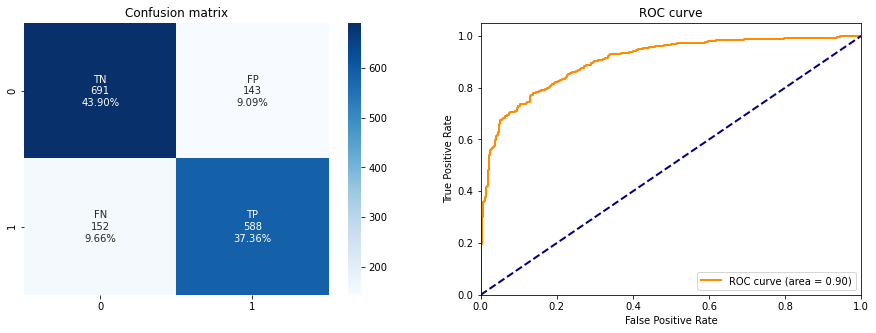

0,812
0,175
0,804
0,794
0,799
0,904


(0.8125794155019059,
 0.1759093619558736,
 0.8043775649794802,
 0.7945945945945946,
 0.7994561522773624,
 0.9044202475857152)

In [8]:
from sklearn.linear_model import LogisticRegression
import utils

print('logistic regression + binary bow')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + binary bow
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.904
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.888
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.888
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.889
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.875

--------------------
BEST PARAMETERS (validation AUC = 0.904)
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
--------------------
0.38
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       834
           1       0.78      0.79      0.78       740

    accuracy                           0.79      1574
   macro avg       0.79      0.79      0.79      1574
weighted avg       0.80      0.79      0.79      1574

AUC:  0.8931168578650595


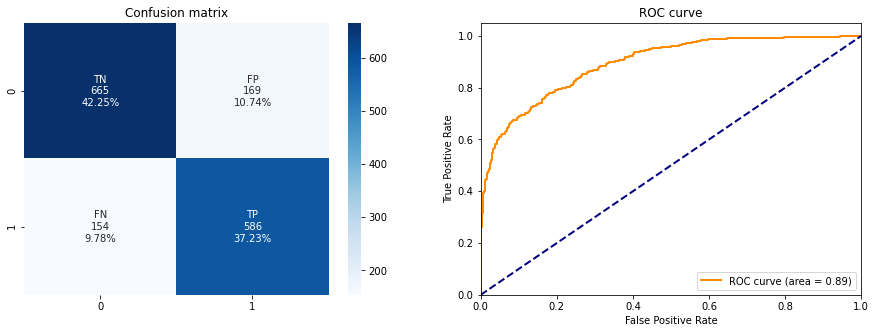

0,794
0,195
0,776
0,791
0,783
0,893


(0.7947903430749682,
 0.1954022988505747,
 0.776158940397351,
 0.7918918918918919,
 0.7839464882943146,
 0.8931168578650595)

In [9]:
from sklearn.neural_network import MLPClassifier

print('mlp + binary bow')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=5)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,2), #(1,3) 
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

tfidf.fit(df_train['preprocessed_text'])   
X_train = tfidf.transform(df_train['preprocessed_text'])
X_test = tfidf.transform(df_test['preprocessed_text'])

logistic regression + tf-idf
0.48
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       834
           1       0.78      0.87      0.82       740

    accuracy                           0.82      1574
   macro avg       0.82      0.82      0.82      1574
weighted avg       0.83      0.82      0.82      1574

AUC:  0.9021420701276816


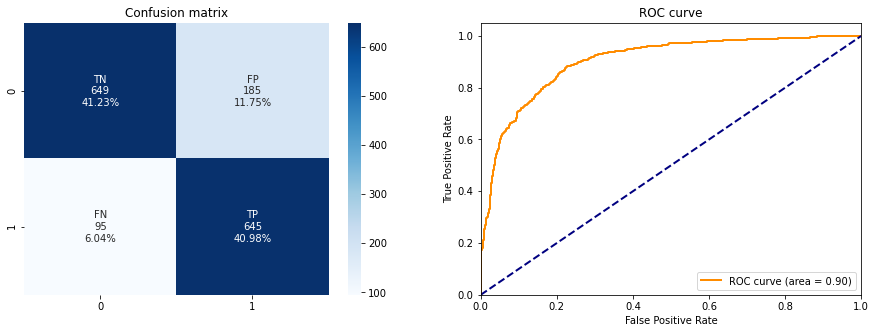

0,822
0,177
0,777
0,871
0,821
0,902


(0.8221092757306226,
 0.17743979721166026,
 0.7771084337349398,
 0.8716216216216216,
 0.821656050955414,
 0.9021420701276816)

In [11]:
print('logistic regression + tf-idf')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + tf-idf
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.896
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.885
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.873
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.878
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.878

--------------------
BEST PARAMETERS (validation AUC = 0.896)
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
--------------------
0.46
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       834
           1       0.76      0.86      0.81       740

    accuracy                           0.81      1574
   macro avg       0.81      0.81      0.81      1574
weighted avg       0.81      0.81      0.81      1574

AUC:  0.9024645148745869


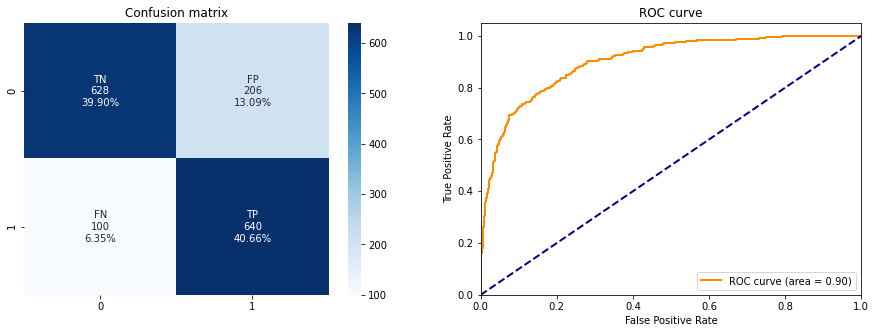

0,805
0,195
0,756
0,864
0,807
0,902


(0.8055908513341804,
 0.19590268886043527,
 0.7565011820330969,
 0.8648648648648649,
 0.807061790668348,
 0.9024645148745869)

In [12]:
print('mlp + tf-idf')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=5)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Word embeddings - Word2Vec

### Create corpus

In [13]:
# df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# corpus = list(df[df['midia']==0]['text'].unique())
# total_iter = len(corpus)
# divs = 10
# step = int(total_iter/divs)

# preprocessed_corpus = []

# for i, t in enumerate(corpus):
#     if i%step==0:
#         print(str((i/step)*divs)+'%')        
#     preprocessed_corpus.append(preprocess(t))      


In [14]:
import pickle

# with open('data/2018/preprocessed_corpus.p.pickle', 'wb') as handle:
#     pickle.dump(preprocessed_corpus, handle)

preprocessed_corpus = pickle.load( open( "data/2018/preprocessed_corpus.p.pickle", "rb" ) )

In [15]:
tokens_documents = [p.split() for p in preprocessed_corpus]

### Train word2vec

In [16]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

class EpochLogger(CallbackAny2Vec):
    """Callback to log information about training"""

    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        self.epoch += 1
        print("W2V: Epoch #{}".format(self.epoch))
        
epoch_logger = EpochLogger()

w2v = Word2Vec(sentences=tokens_documents, vector_size=100, epochs=15, window=5, min_count=1, workers=4, 
                 compute_loss=True, callbacks=[epoch_logger])
w2v.save("data/2018/word2vec.model")

W2V: Epoch #1
W2V: Epoch #2
W2V: Epoch #3
W2V: Epoch #4
W2V: Epoch #5
W2V: Epoch #6
W2V: Epoch #7
W2V: Epoch #8
W2V: Epoch #9
W2V: Epoch #10
W2V: Epoch #11
W2V: Epoch #12
W2V: Epoch #13
W2V: Epoch #14
W2V: Epoch #15


### Load and test

In [17]:
w2v = Word2Vec.load("data/2018/word2vec.model")

In [18]:
w2v.wv.most_similar(positive=['facada'])

[('esfaquear', 0.6313445568084717),
 ('barriga', 0.581384539604187),
 ('faca', 0.5806493759155273),
 ('purpurino', 0.5454385280609131),
 ('agressor', 0.5434315800666809),
 ('ferimento', 0.5381067991256714),
 ('abdomen', 0.5290761590003967),
 ('violentar', 0.5071153044700623),
 ('cuspe', 0.5049540400505066),
 ('suspeitar', 0.4996298551559448)]

In [19]:
w2v.wv['deus']

array([-0.8228198 ,  1.2679476 ,  0.7438907 , -2.5204349 , -3.0583067 ,
        1.3230653 ,  1.7405411 ,  4.1464157 ,  1.4382031 ,  1.3566648 ,
        0.21579187, -1.7289222 , -3.4862645 ,  2.340453  ,  0.63076985,
        0.3545946 , -2.5238612 , -1.8874902 , -2.0189822 , -0.4652913 ,
       -1.2481508 , -2.1825945 , -1.6205806 , -0.13788366, -1.6683303 ,
        0.9676989 , -0.22103001, -1.4354798 , -1.927543  ,  1.1750124 ,
       -2.4214036 ,  1.40951   ,  0.71851456, -6.2841096 , -2.062358  ,
       -1.0938251 ,  1.5386039 ,  0.77918357, -5.353897  ,  1.0168374 ,
       -4.7872744 ,  2.8588011 , -0.434115  , -0.27130654,  2.2097251 ,
       -2.5477283 ,  1.175641  ,  1.0129026 ,  2.3452468 ,  3.8153718 ,
       -0.9506817 , -2.585594  , -1.0526263 , -0.16101697, -0.48423928,
       -2.89379   ,  2.9248953 , -0.10294447,  3.2483141 ,  2.3179731 ,
       -0.8723261 ,  2.2416344 , -1.0821999 , -1.3159556 ,  2.7491908 ,
        0.36830887,  3.219854  ,  4.0491214 , -0.35027623,  0.19

### Vectorize

In [20]:
import numpy as np
x = utils.vectorize_corpus(w2v, ['fora bolsonaro genocida'])
x

array([[-0.64791196,  0.22823209,  0.41009811, -0.88481265,  0.12849088,
         0.45800216, -0.51237637,  0.59028507, -0.26614845, -0.38327896,
        -0.33505128, -0.22730707, -0.260784  ,  0.35856693,  0.48157995,
        -0.87243947, -0.1334899 , -0.20189519, -0.28752933,  0.14212631,
        -1.06673587, -0.30539434, -0.7582044 , -0.37193028,  0.1786802 ,
         0.25463497,  0.24086418,  0.54282723,  0.38463237,  0.61386656,
         0.18799024, -0.4951926 , -0.75862749, -0.11404481,  0.67604236,
         0.86758235,  0.19152372,  0.899569  ,  0.28395107,  0.53334206,
        -0.51006625,  0.15025674, -0.64139142,  0.80005412, -0.34621411,
        -0.13885238,  0.25679059,  0.59312302,  0.00133025,  0.26887474,
         0.39564844,  0.25905916,  0.27102109,  0.03800169, -0.09668516,
        -0.35954621, -0.04963822,  0.32595991,  0.38481562,  0.08540367,
         0.05840938, -0.11231369,  0.61592212,  0.21264692,  0.27809913,
         0.3535561 ,  1.18815327, -0.07904865,  0.2

In [21]:
X_train = utils.vectorize_corpus(w2v, df_train['preprocessed_text'])
X_test = utils.vectorize_corpus(w2v, df_test['preprocessed_text'])
#X_train, X_test = utils.z_score(X_train, X_test)

### Classification

logistic regression + w2v
0.45
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       834
           1       0.70      0.78      0.74       740

    accuracy                           0.74      1574
   macro avg       0.74      0.74      0.74      1574
weighted avg       0.74      0.74      0.74      1574

AUC:  0.8041950223604899


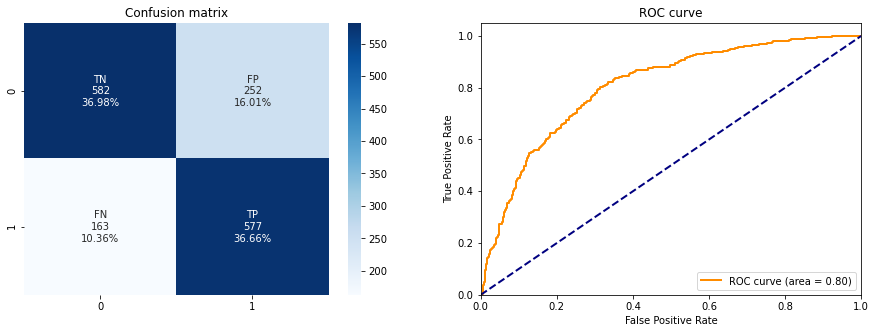

0,736
0,262
0,696
0,779
0,735
0,804


In [22]:
print('logistic regression + w2v')
lrw2v = LogisticRegression()
lrw2v.fit(X_train, y_train)
y_prob = lrw2v.predict_proba(X_test)[:,1]
y_prob_train = lrw2v.predict_proba(X_train)[:,1]
thr = utils.optimal_threshold(y_prob_train,y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
test_metrics = utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + w2v
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.787
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.742
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.854
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.782
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.829
5 
hidden layers: (200, 25, 50); alpha: 0.00000; learning rate: 0.06823; batch: 150
ACC: 0.785
6 
hidden layers: (200,); alpha: 0.00001; learning rate: 0.02102; batch: 250
ACC: 0.819
7 
hidden layers: (25, 25, 125); alpha: 0.00030; learning rate: 0.00686; batch: 250
ACC: 0.809
8 
hidden layers: (125, 250); alpha: 0.00006; learning rate: 0.00691; batch: 100
ACC: 0.830
9 
hidden layers: (200, 250); alpha: 0.00757; learning rate: 0.00911; batch: 200
ACC: 0.838

--------------------
BEST PARAMETERS (validation AUC = 0.854)
hidden l

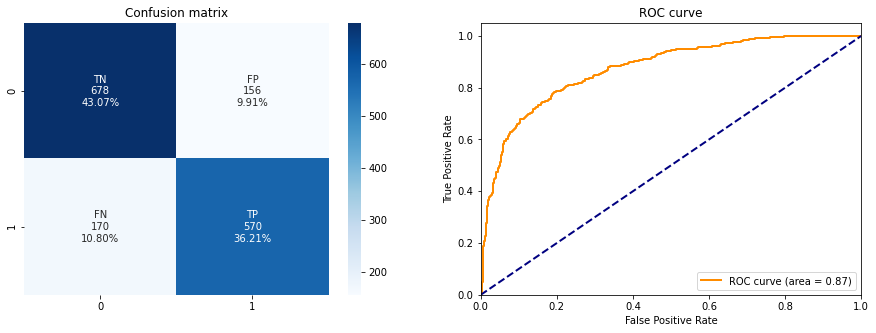

0,792
0,193
0,785
0,770
0,777
0,872


(0.7928843710292249,
 0.19381688466111768,
 0.7851239669421488,
 0.7702702702702703,
 0.7776261937244202,
 0.8724447469051786)

In [23]:
print('mlp + w2v')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Real frequency of test data

In [24]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
df = df[df['misinformation']!=-1][['text','misinformation']]
df

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,text,misinformation
1,O Bolsonaro tem que estar preparado pra respon...,0
15,"No dia 07 de Outubro, quando for votar, não es...",1
26,Devido a aborrecimentos nas varias redes socia...,0
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0
103,Como são as coisas.\nChefe do jacaré aparece n...,1
...,...,...
282555,👏👏👏👏 \nTerminou a apuração dos votos no JAPÃO ...,0
282556,https://youtu.be/UwDXPrFkU7M\n\n😡Notícias URGE...,1
282558,https://m.facebook.com/story.php?story_fbid=19...,0
282564,#B17\n#B17\n#B17\n#B17\n#B17\n#B17\n#B17\n#B17...,1


In [25]:
total_texts = []
total_mis = []

for t in df_test['text']:
    q = df[df['text']==t]
    duplicates = len(q)
    if duplicates == 0:
        continue
    
    total_texts += [t]*duplicates
    total_mis += list(q['misinformation'])
    

In [26]:
df_test_real = pd.DataFrame({'text':total_texts, 'misinformation':total_mis})
print('real world size of test data:',len(df_test_real))

real world size of test data: 4346


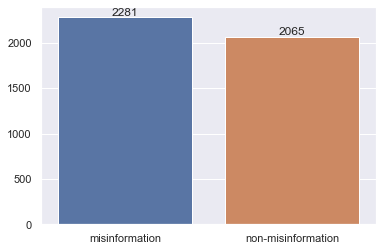

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

def print_class_balance(y):
    pos_mask = y == 1 
    pos = y[pos_mask]
    neg_mask = y == 0 
    neg = y[neg_mask]
    values = [pos.shape[0],neg.shape[0]]
    keys = ['misinformation', 'non-misinformation']
    g = sns.barplot(x = keys, y = values)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
print_class_balance(df_test_real['misinformation'])

In [28]:
df_test_real['preprocessed_text'] = [preprocess(t) for t in df_test_real['text']]

logistic regression + tf-idf
0.48
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2065
           1       0.80      0.84      0.82      2281

    accuracy                           0.81      4346
   macro avg       0.81      0.81      0.81      4346
weighted avg       0.81      0.81      0.81      4346

AUC:  0.8913933717105089


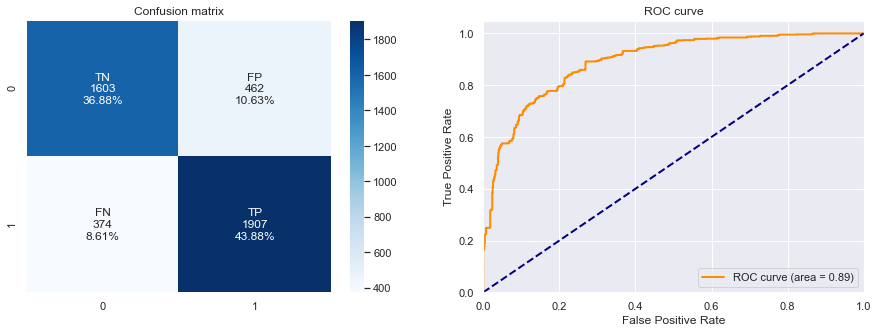

0,807
0,206
0,804
0,836
0,820
0,891


(0.8076392084675563,
 0.2068283028203859,
 0.8049810046433095,
 0.8360368259535291,
 0.8202150537634408,
 0.8913933717105089)

In [29]:
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,2), #(1,3) 
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

tfidf.fit(df_train['preprocessed_text'])   
X_train = tfidf.transform(df_train['preprocessed_text'])
X_test = tfidf.transform(df_test_real['preprocessed_text'])
y_train = df_train['misinformation']
y_test = df_test_real['misinformation']

print('logistic regression + tf-idf')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)